In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors


In [74]:
schools = pd.read_csv("scc_school_data.csv")
schools.head()

,School Name,School District,City,Total Students,County Name,District Name,Open Date,Charter,Funding Type,Virtual,...,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y,Graduation Rate
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,Santa Clara,San Jose Unified,7/1/1980 12:00:00 AM,N,NaN,C,...,0.0,1005,59.4,166,9.8,907,53.6,-1.357254e+07,4.484949e+06,95%
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,Santa Clara,Santa Clara Unified,7/1/1980 12:00:00 AM,N,NaN,N,...,0.2,835,44.9,259,13.9,739,39.8,-1.357951e+07,4.490249e+06,95%
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,Santa Clara,Morgan Hill Unified,8/26/2004 12:00:00 AM,N,NaN,C,...,1.1,443,29.1,159,10.5,416,27.4,-1.354417e+07,4.461488e+06,96%
3,Branham High School,Campbell Union High School District,San Jose,1911,Santa Clara,Campbell Union High,8/16/1999 12:00:00 AM,N,NaN,N,...,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06,93%
4,Christopher High School,Gilroy Unified School District,Gilroy,1707,Santa Clara,Gilroy Unified,8/20/2009 12:00:00 AM,N,NaN,N,...,0.1,661,39.7,210,12.6,580,34.9,-1.353662e+07,4.444210e+06,93%


In [75]:
# refactor the graduation rate column 
schools['Graduation Rate'] = schools['Graduation Rate'].str.findall('(\d+)%').str[0]
schools['Graduation Rate'] = schools['Graduation Rate'].astype(int)
schools.head()

,School Name,School District,City,Total Students,County Name,District Name,Open Date,Charter,Funding Type,Virtual,...,Migrant (%),Socioeconomically Disadvantaged,Socioeconomically Disadvantaged (%),Students with Disabilities,Students with Disabilities (%),Free/Reduced Meal Eligible,Free/Reduced Meal Eligible (%),x,y,Graduation Rate
0,Abraham Lincoln High School,San Jose Unified School District,San Jose,1703,Santa Clara,San Jose Unified,7/1/1980 12:00:00 AM,N,NaN,C,...,0.0,1005,59.4,166,9.8,907,53.6,-1.357254e+07,4.484949e+06,95
1,Adrian Wilcox High School,Santa Clara Unified School District,Santa Clara,1981,Santa Clara,Santa Clara Unified,7/1/1980 12:00:00 AM,N,NaN,N,...,0.2,835,44.9,259,13.9,739,39.8,-1.357951e+07,4.490249e+06,95
2,Ann Sobrato High School,Morgan Hill Unified School District,Morgan Hill,1476,Santa Clara,Morgan Hill Unified,8/26/2004 12:00:00 AM,N,NaN,C,...,1.1,443,29.1,159,10.5,416,27.4,-1.354417e+07,4.461488e+06,96
3,Branham High School,Campbell Union High School District,San Jose,1911,Santa Clara,Campbell Union High,8/16/1999 12:00:00 AM,N,NaN,N,...,0.0,663,33.3,241,12.1,589,29.6,-1.356976e+07,4.474545e+06,93
4,Christopher High School,Gilroy Unified School District,Gilroy,1707,Santa Clara,Gilroy Unified,8/20/2009 12:00:00 AM,N,NaN,N,...,0.1,661,39.7,210,12.6,580,34.9,-1.353662e+07,4.444210e+06,93


## Exploratory Data Analysis

<AxesSubplot:>

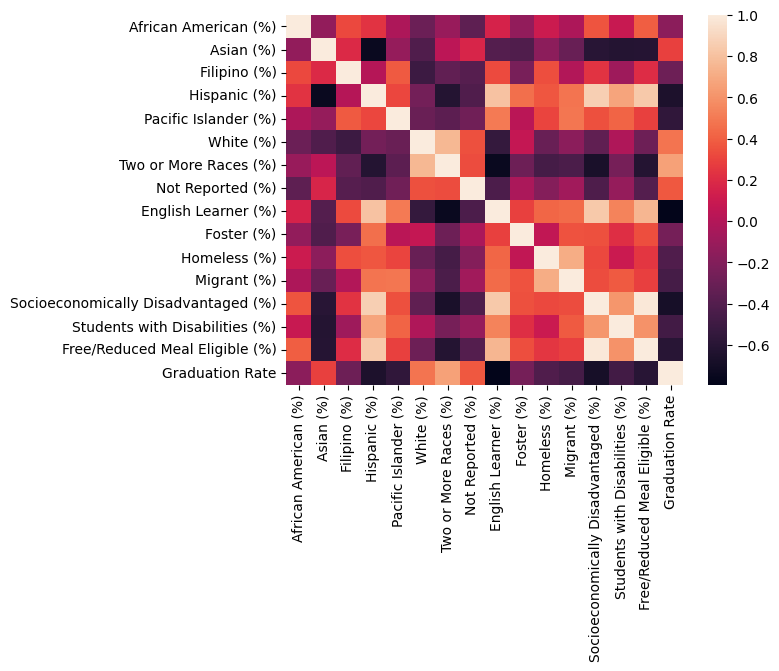

In [76]:
# a heatmap of columns in schools representing percentages of students
cols = [col for col in schools.columns if '%' in col] + ['Graduation Rate']
corr = schools[cols].corr()

sns.heatmap(corr)

African American (%)                  -0.166841
Asian (%)                              0.292628
Filipino (%)                          -0.290050
Hispanic (%)                          -0.652214
Pacific Islander (%)                  -0.565118
White (%)                              0.480780
Two or More Races (%)                  0.659194
Not Reported (%)                       0.371858
English Learner (%)                   -0.791545
Foster (%)                            -0.257420
Homeless (%)                          -0.414926
Migrant (%)                           -0.462702
Socioeconomically Disadvantaged (%)   -0.681362
Students with Disabilities (%)        -0.479695
Free/Reduced Meal Eligible (%)        -0.596547
Graduation Rate                        1.000000
Name: Graduation Rate, dtype: float64


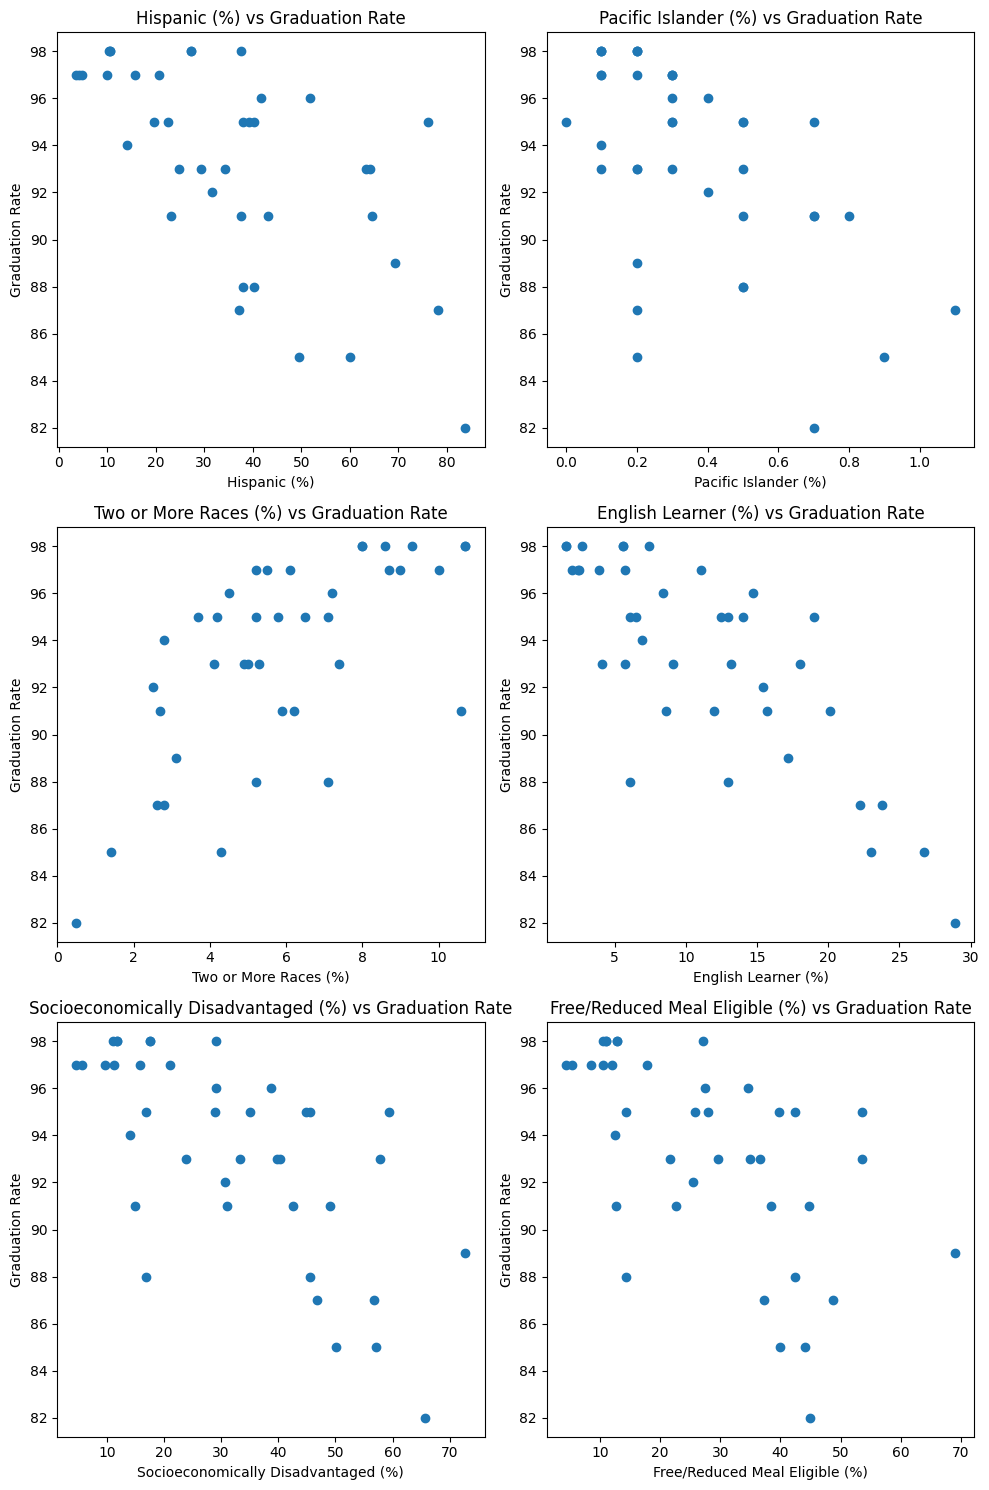

In [90]:
# plotting high correlation features with grad rates
corrs = schools[cols].corr()['Graduation Rate']
print(corrs)
high_corr_cols = corrs[abs(corrs.values) > 0.5].index.tolist()
high_corr_cols.remove('Graduation Rate')

num_rows = len(high_corr_cols) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(10,15))
axes = axes.flatten()

for i, col in enumerate(high_corr_cols):
    ax = axes[i]
    ax.scatter(x=schools[col], y=schools['Graduation Rate'])
    ax.set_title(col + ' vs Graduation Rate')
    ax.set_xlabel(col)
    ax.set_ylabel('Graduation Rate')
    
plt.tight_layout()
plt.show()


In [88]:
schools.columns

Index(['School Name', 'School District', 'City', 'Total Students',
       'County Name', 'District Name', 'Open Date', 'Charter', 'Funding Type',
       'Virtual', 'Magnet', 'Title I', 'DASS', 'Assistance Status ESSA',
       'Street', 'Zip', 'State', 'US Congress District', 'CA Senate District',
       'CA Assembly District', 'Locale', 'Latitude', 'Longitude',
       'Enroll Total', 'African American', 'African American (%)',
       'American Indian', 'American Indian Pct', 'Asian', 'Asian (%)',
       'Filipino', 'Filipino (%)', 'Hispanic', 'Hispanic (%)',
       'Pacific Islander', 'Pacific Islander (%)', 'White', 'White (%)',
       'Two or More Races', 'Two or More Races (%)', 'Not Reported',
       'Not Reported (%)', 'English Learner', 'English Learner (%)', 'Foster',
       'Foster (%)', 'Homeless', 'Homeless (%)', 'Migrant', 'Migrant (%)',
       'Socioeconomically Disadvantaged',
       'Socioeconomically Disadvantaged (%)', 'Students with Disabilities',
       'Students with

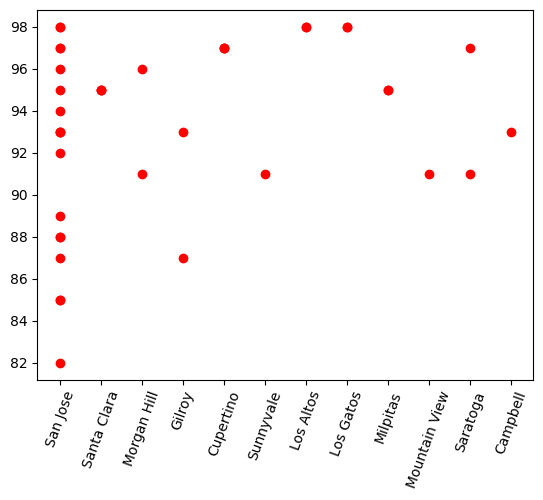

In [131]:
plt.scatter(x=schools['City'], y=schools['Graduation Rate'], color='red')
plt.xticks(rotation=70);